In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (confusion_matrix, f1_score, make_scorer,
                             roc_auc_score)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [25]:
df = pd.read_csv("D:\project\DVC_Experiment\DVC_experiment\data\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df.shape

(10000, 14)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
df = df.loc[df['Geography'].isin(['France', 'Spain'])]


In [33]:
df.drop('RowNumber', axis=1, inplace=True)


In [34]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [35]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
df['Geography'].value_counts()

Geography
France    5014
Spain     2477
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7491 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       7491 non-null   int64  
 1   Surname          7491 non-null   object 
 2   CreditScore      7491 non-null   int64  
 3   Geography        7491 non-null   object 
 4   Gender           7491 non-null   object 
 5   Age              7491 non-null   int64  
 6   Tenure           7491 non-null   int64  
 7   Balance          7491 non-null   float64
 8   NumOfProducts    7491 non-null   int64  
 9   HasCrCard        7491 non-null   int64  
 10  IsActiveMember   7491 non-null   int64  
 11  EstimatedSalary  7491 non-null   float64
 12  Exited           7491 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 819.3+ KB


In [40]:
feature_col = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard',
               'IsActiveMember','EstimatedSalary']

targ_col = 'Exited'

In [41]:
X = df[feature_col]
y = df[targ_col]

In [42]:
print("shape of X", X.shape)
print("shape of y", y.shape)

shape of X (7491, 8)
shape of y (7491,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [45]:
random_state = 42
train_params = {'n_estimators':100,
                'max_depth':10}

clf = RandomForestClassifier(random_state=random_state, **train_params)

model = Pipeline(
    steps=[("preprocessor", SimpleImputer()),
           ("clf", clf)]
)

model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor', SimpleImputer()),
                ('clf', RandomForestClassifier(max_depth=10, random_state=42))])

In [46]:
y_prob = model.predict_proba(X_test)
y_pred = y_prob[:,1]>= 0.5
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob[:,1])
f1, roc_auc

(0.5582655826558266, 0.8623641367728693)

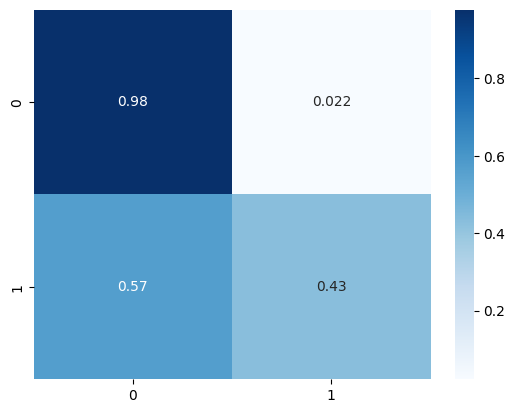

In [48]:
reports_dir = Path(os.getcwd()).parent.absolute()/'reports'
reports_dir.mkdir(exist_ok=True)
fig_dir = reports_dir/'figures'
fig_dir.mkdir(exist_ok=True)

cm = confusion_matrix(y_test, y_pred, normalize='true') 
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.savefig(fig_dir/'cm.png')

In [49]:
from joblib import dump

models_dir = Path(os.getcwd()).parent.absolute()/'models'
models_dir.mkdir(exist_ok=True)
dump(model, models_dir/'clf-model.joblib');